<a href="https://colab.research.google.com/github/Adeola-Jay/KNN-Projects/blob/main/K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libaries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading dataset
dataset = pd.read_csv('Occupancy Data 2.csv')
dataset

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,Occupied
1,2,21.79,31.00,437.33,1000.00,0.005009,Occupied
2,3,21.77,31.12,434.00,1003.75,0.005022,Occupied
3,4,21.77,31.12,439.00,1009.50,0.005022,Occupied
4,5,21.79,31.13,437.33,1005.67,0.005030,Occupied
...,...,...,...,...,...,...,...
9747,9748,20.82,27.72,429.75,1505.25,0.004213,Occupied
9748,9749,20.87,27.75,423.50,1514.50,0.004230,Occupied
9749,9750,20.89,27.75,423.50,1521.50,0.004237,Occupied
9750,9751,20.89,28.02,418.75,1632.00,0.004279,Occupied


In [ ]:
dataset.shape

(9752, 7)

In [ ]:
dataset.head()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,Occupied
1,2,21.79,31.00,437.33,1000.00,0.005009,Occupied
2,3,21.77,31.12,434.00,1003.75,0.005022,Occupied
3,4,21.77,31.12,439.00,1009.50,0.005022,Occupied
4,5,21.79,31.13,437.33,1005.67,0.005030,Occupied


In [ ]:
dataset.tail()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
9747,9748,20.82,27.72,429.75,1505.25,0.004213,Occupied
9748,9749,20.87,27.75,423.50,1514.50,0.004230,Occupied
9749,9750,20.89,27.75,423.50,1521.50,0.004237,Occupied
9750,9751,20.89,28.02,418.75,1632.00,0.004279,Occupied
9751,9752,21.00,28.10,409.00,1864.00,0.004321,Occupied


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Date             9752 non-null   int64  
 1   Temperature         9752 non-null   float64
 2   Humidity            9752 non-null   float64
 3   Light               9752 non-null   float64
 4   CO2                 9752 non-null   float64
 5   HumidityRatio       9752 non-null   float64
 6   OccupancyDetection  9752 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [ ]:
dataset.isnull().sum()

ID_Date               0
Temperature           0
Humidity              0
Light                 0
CO2                   0
HumidityRatio         0
OccupancyDetection    0
dtype: int64

In [ ]:
dataset.describe()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,4876.500000,21.002133,29.892659,123.067922,753.224820,0.004589
std,2815.304246,1.020825,3.952732,208.221273,297.096118,0.000531
min,1.000000,19.500000,21.870000,0.000000,484.670000,0.003275
25%,2438.750000,20.290000,26.645000,0.000000,542.310000,0.004196
50%,4876.500000,20.790000,30.200000,0.000000,639.000000,0.004593
75%,7314.250000,21.530000,32.700000,208.250000,831.125000,0.004998
max,9752.000000,24.390000,39.500000,1581.000000,2076.500000,0.005769


In [ ]:
dataset.describe(include='all')

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Not Occupied
freq,NaN,NaN,NaN,NaN,NaN,NaN,7703
mean,4876.500000,21.002133,29.892659,123.067922,753.224820,0.004589,NaN
std,2815.304246,1.020825,3.952732,208.221273,297.096118,0.000531,NaN
min,1.000000,19.500000,21.870000,0.000000,484.670000,0.003275,NaN
25%,2438.750000,20.290000,26.645000,0.000000,542.310000,0.004196,NaN
50%,4876.500000,20.790000,30.200000,0.000000,639.000000,0.004593,NaN
75%,7314.250000,21.530000,32.700000,208.250000,831.125000,0.004998,NaN


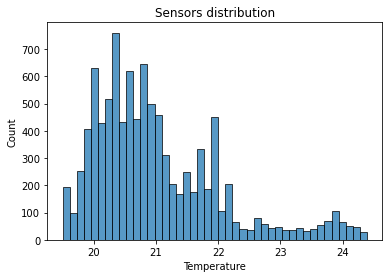

In [ ]:
sns.histplot(dataset.Temperature)
plt.title('Sensors distribution')
plt.show()

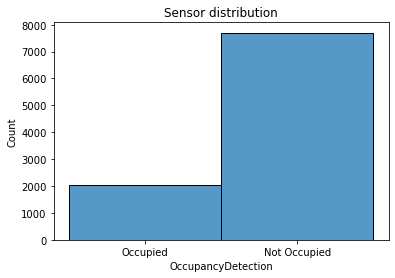

In [ ]:
sns.histplot(dataset.OccupancyDetection)
plt.title('Sensor distribution')
plt.show()

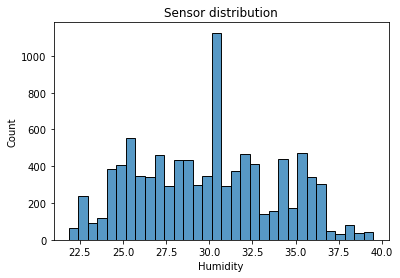

In [ ]:
sns.histplot(dataset.Humidity)
plt.title('Sensor distribution')
plt.show()

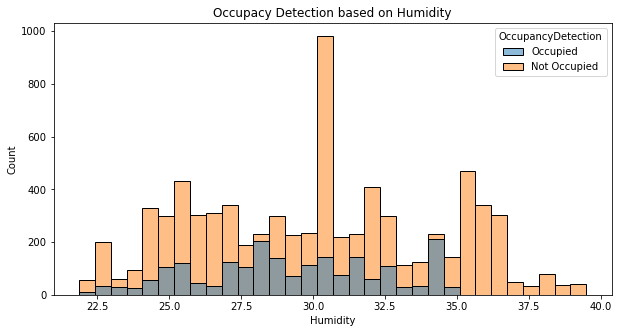

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Occupacy Detection based on Humidity")
sns.histplot(x= "Humidity", hue="OccupancyDetection", data=dataset)
plt.show()

In [ ]:
dataset['OccupancyDetection']=dataset['OccupancyDetection'].replace(['Not Occupied', 'Occupied'],[0,1])

dataset

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,1
1,2,21.79,31.00,437.33,1000.00,0.005009,1
2,3,21.77,31.12,434.00,1003.75,0.005022,1
3,4,21.77,31.12,439.00,1009.50,0.005022,1
4,5,21.79,31.13,437.33,1005.67,0.005030,1
...,...,...,...,...,...,...,...
9747,9748,20.82,27.72,429.75,1505.25,0.004213,1
9748,9749,20.87,27.75,423.50,1514.50,0.004230,1
9749,9750,20.89,27.75,423.50,1521.50,0.004237,1
9750,9751,20.89,28.02,418.75,1632.00,0.004279,1


In [ ]:
dataset.head()

,ID_Date,Temperature,Humidity,Light,CO2,HumidityRatio,OccupancyDetection
0,1,21.76,31.13,437.33,1029.67,0.005021,1
1,2,21.79,31.00,437.33,1000.00,0.005009,1
2,3,21.77,31.12,434.00,1003.75,0.005022,1
3,4,21.77,31.12,439.00,1009.50,0.005022,1
4,5,21.79,31.13,437.33,1005.67,0.005030,1


In [ ]:
X = dataset.iloc[:, [1, 2, 3, 4]].values
y = dataset.iloc[:, 6].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)

In [ ]:
%pip install imblearn
import imblearn

In [ ]:
dataset['OccupancyDetection'].value_counts()

0    7703
1    2049
Name: OccupancyDetection, dtype: int64

C:\Users\adeol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OccupancyDetection', ylabel='count'>

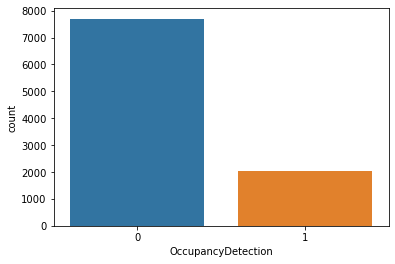

In [ ]:
sns.countplot(dataset['OccupancyDetection'])

<AxesSubplot:ylabel='count'>

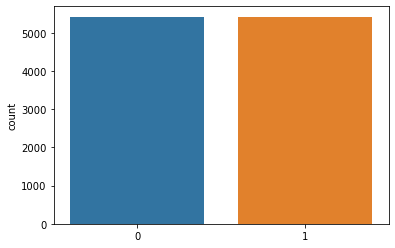

In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

sns.countplot(x=y_train_oversampled)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [ ]:
# Fitting K-NN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred=classifier.predict(X_test_s)
print(y_pred)

[1 0 0 ... 0 1 1]


In [ ]:
print(y_test)

[1 0 0 ... 0 1 1]


In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('----------------------------------------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('classification Report:\n')
print(result)

accuracy:0.99


Confusion Matrix:
[[2265   15]
 [   3  643]] 


----------------------------------------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2280
           1       0.98      1.00      0.99       646

    accuracy                           0.99      2926
   macro avg       0.99      0.99      0.99      2926
weighted avg       0.99      0.99      0.99      2926



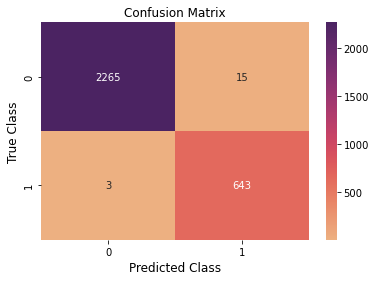

In [ ]:
ax = sns.heatmap(cm, cmap= 'flare' ,annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()